In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%config InlineBackend.figure_format = 'retina'
import math
from collections import Counter
np.random.seed(0)

In [2]:
#First class
train_data = np.random.normal(size=(50,2))
train_labels = np.zeros(50)

#Second class
train_data = np.r_[train_data, np.random.normal(size=(50,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(50)]

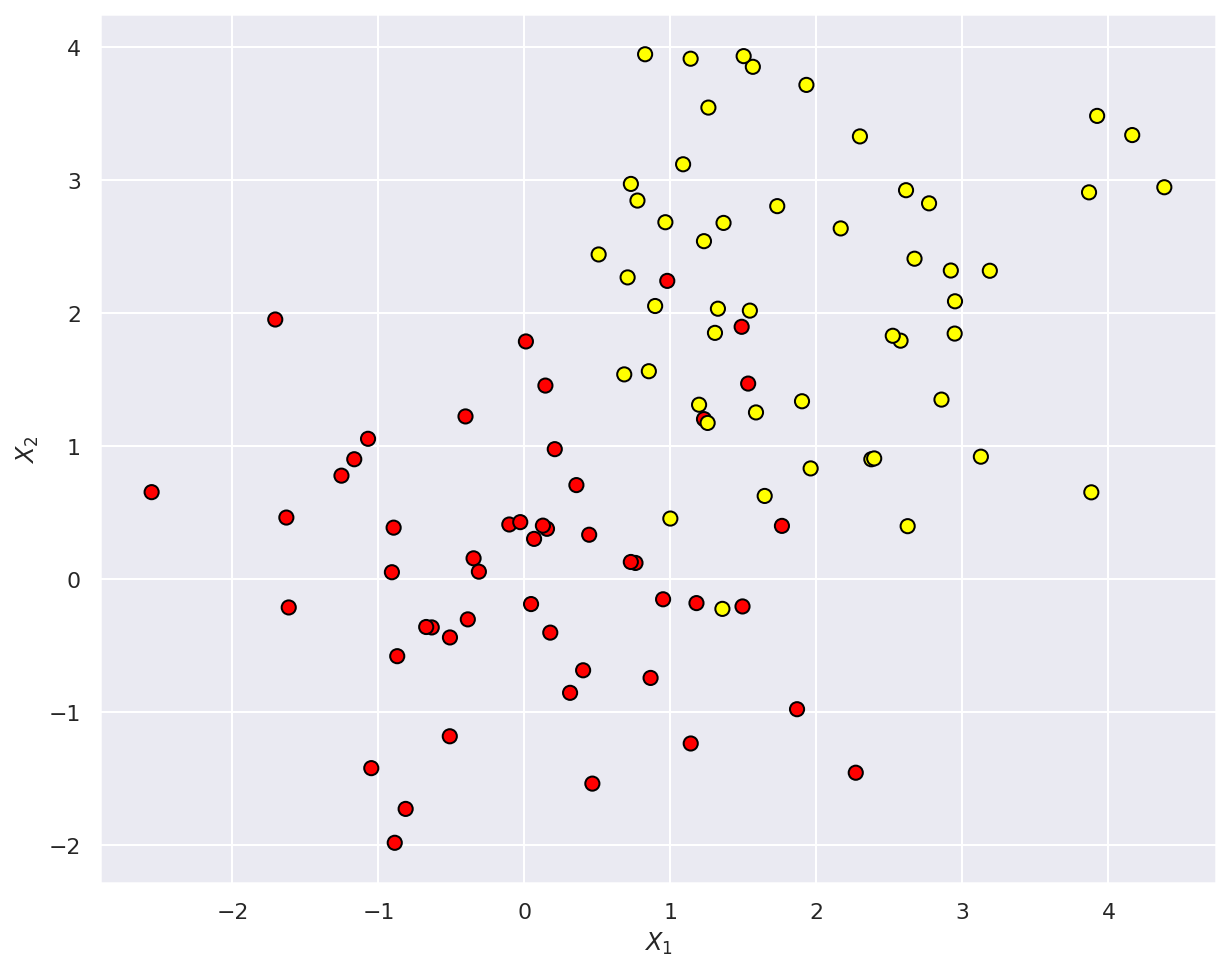

In [3]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=50, cmap='autumn', edgecolors='black')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

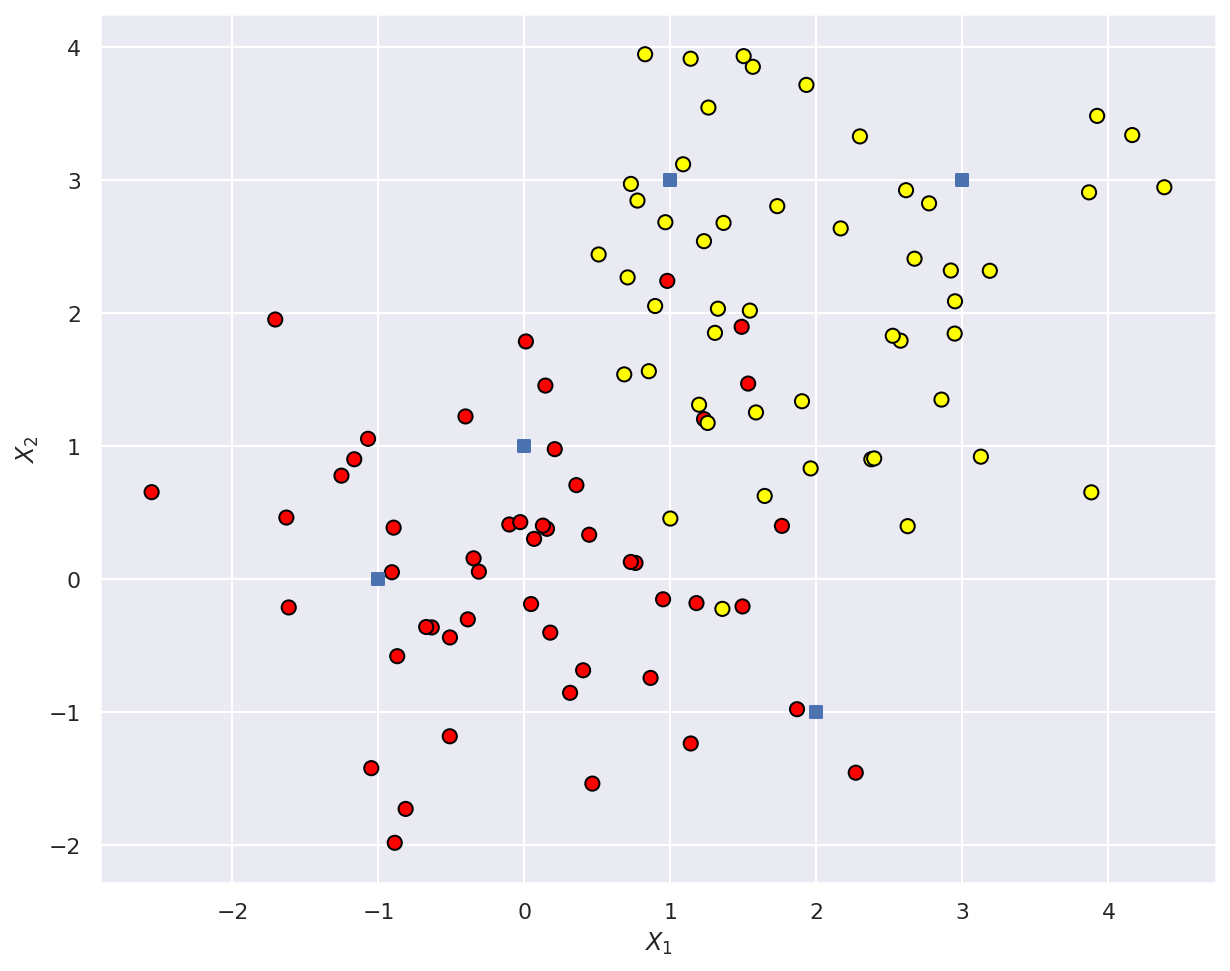

In [43]:
unseen_data = [[0,1],[1,3],[-1,0],[3,3],[2,-1]]
unseen_data = np.array(prediction)

plt.figure(figsize=(10,8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, s=50, cmap='autumn', edgecolors='black')
plt.scatter(unseen_data[:,0], unseen_data[:,1], marker='s')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [13]:
def euclidean_distance(value, k):
    distance = np.sqrt(np.sum((train_data - value) ** 2, axis=1))
    return np.argsort(distance)[0:k]

In [44]:
def predict(prediction, k):
    labels_ = []
    
    for value in prediction:
        measure = euclidean_distance(value, k)
        
        result_ = []
        for index in measure:
            result_.append(train_labels[index])
            
        label=Counter(result_).most_common(1)
        labels_.append([value, label[0][0]])
    
    return labels_

In [45]:
result=predict(unseen_data,10)
for i in result:
    print("Value = ",i[0])
    print("Class = ",i[1])
    print()

Value =  [0 1]
Class =  0.0

Value =  [1 3]
Class =  1.0

Value =  [-1  0]
Class =  0.0

Value =  [3 3]
Class =  1.0

Value =  [ 2 -1]
Class =  0.0



In [46]:
results=predict(train_data, 10)
predictions = []
for i in results:
    predictions.append(i[1])
print(predictions)

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [69]:
train_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [65]:
def accuracy(pred):
    error = np.sum((pred - train_labels) ** 2)
    accuracy = 1 - (error/len(train_labels))*1
    return accuracy

In [66]:
acc = []
for k in range(1,10):
    result = predict(train_data, k)
    pred = []
    for i in result:
        pred.append(i[1])
    acc.append([accuracy(pred), k])

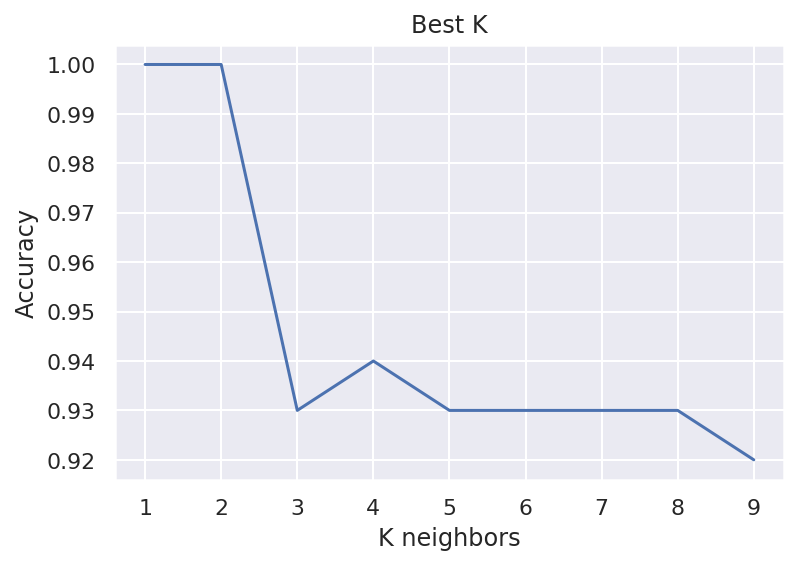

In [68]:
X_ticks = []
y_ticks = []
for i in acc:
    X_ticks.append(i[1])
    y_ticks.append(i[0])
plt.plot(X_ticks, y_ticks)
plt.title('Best K')
plt.xlabel('K neighbors')
plt.ylabel('Accuracy')
plt.show()